# Домашнее задание 3 [10 баллов]


# До 27.03.18 23:59

Рассмотрим задачу бинарной классификации. Пусть дано два списка имен: мужские и женские имена. Требуется разработать классификатор, который по данному имени будет определять мужское оно или женское.

Данные: 
* Женские имена: female.txt
* Мужские имена: male.txt

## Часть 1. Предварительная

### Предварительная обработка данных [2 балла]

1. Удалите неоднозначные имена (те имена, которые являются и мужскими, и женскими дновременно), если такие есть; 
2. Создайте обучающее и тестовое множество так, чтобы в обучающем множестве классы были сбалансированы, т.е. к классу принадлежало бы одинаковое количество имен;

In [1]:
import sys
sys.path.append('C:\Program Files\Anaconda3\Lib\site-packages')

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split

In [3]:
def slurp(path):
    with open(path, 'r') as fo:
        return fo.readlines()

In [222]:
female_path = '/home/nst/mount/data/linguistics_hse/machine_learning/ML-for-compling-teacher/hw4_names/female.txt'
male_path = '/home/nst/mount/data/linguistics_hse/machine_learning/ML-for-compling-teacher/hw4_names/male.txt'

In [4]:
female_path = 'C:/Users/Анна/Dropbox/ML_sent/hw4_names/female.txt'
male_path = 'C:/Users/Анна/Dropbox/ML_sent/hw4_names/male.txt'

### Удалим неоднозначные имена

In [5]:
females = slurp(female_path)
males = slurp(male_path)
print('Females:', len(females))
print('Males:', len(males))

def drop_duplicates(f_list, m_list):
    males = [name.rstrip() for name in m_list if name not in f_list]
    females = [name.rstrip() for name in f_list if name not in m_list]
    print('Drop females:', len(females))
    print('Drop males:', len(males))
    return females, males

drop_females, drop_males = drop_duplicates(females, males)

Females: 5001
Males: 2943
Drop females: 4636
Drop males: 2578


### Обучающее и тестовое множество

In [6]:
def make_class_markers(f_list, m_list):
    female_class = [(1, name) for name in f_list]
    male_class = [(0, name) for name in m_list]
    return female_class, male_class

def split_train_test(f_list, m_list):
    f, m = make_class_markers(f_list, m_list)
    
    fnames = [name for num, name in f]
    fmarks = [num for num, name in f]
    
    mnames = [name for num, name in m]
    mmarks = [num for num, name in m]
    # Split the second part of the train set proportionally and join train/test sets
    if len(f) < len(m):
        X_train, X_test, y_train, y_test = train_test_split(fnames, fmarks, 
                                            test_size=0.3, random_state=42)
        X_mtrain = mnames[:len(X_train)+1]
        y_mtrain = mmarks[:len(X_train)+1]
        
        X_mtest = mnames[len(X_train):]
        y_mtest = mmarks[len(X_train):]
        
        X_train += X_mtrain
        X_test += X_mtest
        
        y_train += y_mtrain
        y_test += y_mtest
        
    else:
        X_train, X_test, y_train, y_test = train_test_split(mnames, mmarks, 
                                            test_size=0.3, random_state=42)
        X_ftrain = fnames[:len(X_train)+1]
        y_ftrain = fmarks[:len(X_train)+1]
        
        X_ftest = fnames[len(X_train):]
        y_ftest = fmarks[len(X_train):]
        
        X_train += X_ftrain
        X_test += X_ftest
        
        y_train += y_ftrain
        y_test += y_ftest
    return X_train, X_test, y_train, y_test

In [7]:
X_train, X_test, y_train, y_test = split_train_test(drop_females, drop_males)

In [8]:
print(len(X_train), len(X_test))

3609 3606


##  Часть 2. Базовая 

### Базовый метод классификации [3 балла]

Используйте метод наивного Байеса или логистическую регрессию для классификации имен: в качестве признаков используйте символьные $n$-граммы. Сравните результаты, получаемые при разных $n=2,3,4$ по $F$-мере и аккуратности. В каких случаях метод ошибается?

Для генерации $n$-грамм используйте:

In [20]:
import nltk
from nltk.util import ngrams
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

### Multinomial NB with bigrams

In [10]:
bigram_vect = CountVectorizer(ngram_range = [2,2], analyzer = 'char_wb')
X_train_bigram = bigram_vect.fit_transform(X_train)
X_test_bigram = bigram_vect.transform(X_test)

classifier_2 = MultinomialNB(alpha=0.001)
classifier_2.fit(X_train_bigram, y_train)

MultinomialNB(alpha=0.001, class_prior=None, fit_prior=True)

In [11]:
y_predict_bigrams = classifier_2.predict(X_test_bigram)

In [12]:
print('Accuracy score:', accuracy_score(y_test, y_predict_bigrams))
print('F-score:', f1_score(y_test, y_predict_bigrams))

Accuracy score: 0.205768164171
F-score: 0.0369872225958


             precision    recall  f1-score   support

          0       0.20      0.89      0.32       774
          1       0.39      0.02      0.04      2832

avg / total       0.35      0.21      0.10      3606



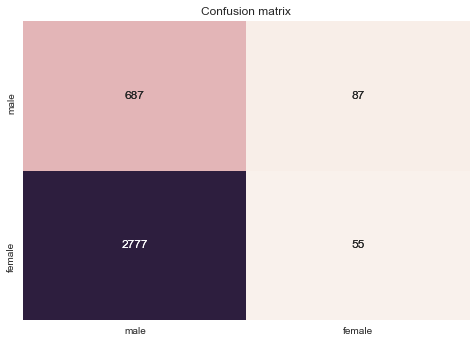

In [21]:
labels = list(set(y_test))
print(classification_report(y_test, y_predict_bigrams))
sns.heatmap(data=confusion_matrix(y_test, y_predict_bigrams, labels = labels), 
            annot=True, fmt="d", cbar=False, xticklabels=['male', 'female'], 
                                             yticklabels=['male', 'female'])
plt.title("Confusion matrix")
plt.show()

### Multinomial NB with trigrams

In [22]:
trigram_vect = CountVectorizer(ngram_range = [3,3], analyzer = 'char_wb')
X_train_trigram = trigram_vect.fit_transform(X_train)
X_test_trigram = trigram_vect.transform(X_test)

classifier_3 = MultinomialNB(alpha=0.001)
classifier_3.fit(X_train_trigram, y_train)

MultinomialNB(alpha=0.001, class_prior=None, fit_prior=True)

In [23]:
y_predict_trigrams = classifier_3.predict(X_test_trigram)

In [24]:
print('Accuracy score:', accuracy_score(y_test, y_predict_trigrams))
print('F-score:', f1_score(y_test, y_predict_trigrams))

Accuracy score: 0.357737104825
F-score: 0.337528604119


             precision    recall  f1-score   support

          0       0.24      0.90      0.38       774
          1       0.89      0.21      0.34      2832

avg / total       0.75      0.36      0.35      3606



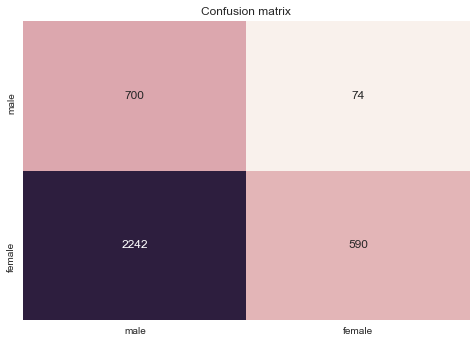

In [25]:
labels = list(set(y_test))
print(classification_report(y_test, y_predict_trigrams))
sns.heatmap(data=confusion_matrix(y_test, y_predict_trigrams, labels = labels), 
            annot=True, fmt="d", cbar=False, xticklabels=['male', 'female'], 
                                             yticklabels=['male', 'female'])
plt.title("Confusion matrix")
plt.show()

### Multinomial NB with 4-grams

In [26]:
fourgram_vect = CountVectorizer(ngram_range = [4,4], analyzer = 'char_wb')
X_train_fourgram = fourgram_vect.fit_transform(X_train)
X_test_fourgram = fourgram_vect.transform(X_test)

classifier_4 = MultinomialNB(alpha=0.001)
classifier_4.fit(X_train_fourgram, y_train)

MultinomialNB(alpha=0.001, class_prior=None, fit_prior=True)

In [27]:
y_predict_fourgram = classifier_4.predict(X_test_fourgram)

In [28]:
print('Accuracy score:', accuracy_score(y_test, y_predict_fourgram))
print('F-score:', f1_score(y_test, y_predict_fourgram))

Accuracy score: 0.655019412091
F-score: 0.732817869416


             precision    recall  f1-score   support

          0       0.37      0.85      0.51       774
          1       0.94      0.60      0.73      2832

avg / total       0.81      0.66      0.69      3606



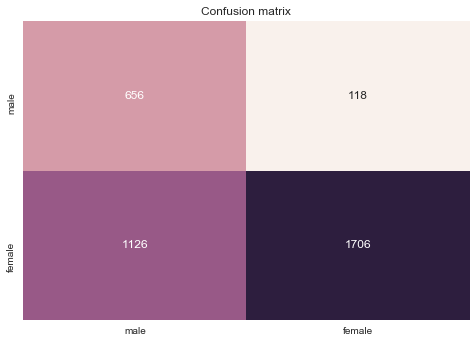

In [29]:
labels = list(set(y_test))
print(classification_report(y_test, y_predict_fourgram))
sns.heatmap(data=confusion_matrix(y_test, y_predict_fourgram, labels = labels), 
            annot=True, fmt="d", cbar=False, xticklabels=['male', 'female'], 
                                             yticklabels=['male', 'female'])
plt.title("Confusion matrix")
plt.show()

Лучший результат классификации методом наивного Байеса был получен для символьных 4-грамм. При этом мужские имена достаточно хорошо определялись при любых н-граммах, а женские имена сильно путаются с мужскими. 

In [33]:
fivegram_vect = CountVectorizer(ngram_range = [5,5], analyzer = 'char_wb')
X_train_fivegram = fivegram_vect.fit_transform(X_train)
X_test_fivegram = fivegram_vect.transform(X_test)

classifier_5 = MultinomialNB(alpha=0.001)
classifier_5.fit(X_train_fivegram, y_train)

MultinomialNB(alpha=0.001, class_prior=None, fit_prior=True)

In [34]:
y_predict_fivegram = classifier_5.predict(X_test_fivegram)

In [35]:
print('Accuracy score:', accuracy_score(y_test, y_predict_fivegram))
print('F-score:', f1_score(y_test, y_predict_fivegram))

Accuracy score: 0.748197448697
F-score: 0.828679245283


             precision    recall  f1-score   support

          0       0.44      0.65      0.53       774
          1       0.89      0.78      0.83      2832

avg / total       0.79      0.75      0.76      3606



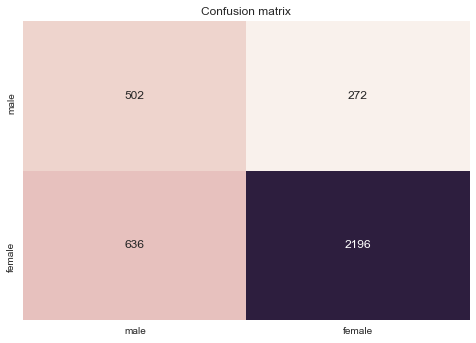

In [36]:
labels = list(set(y_test))
print(classification_report(y_test, y_predict_fivegram))
sns.heatmap(data=confusion_matrix(y_test, y_predict_fivegram, labels = labels), 
            annot=True, fmt="d", cbar=False, xticklabels=['male', 'female'], 
                                             yticklabels=['male', 'female'])
plt.title("Confusion matrix")
plt.show()

А при использовании 5-грамм уже заметно падает качество определения мужских имен, при этом качество определения женских имен растет.

##  Часть 3. Нейросетевая 

### Нейронная сеть [4 балла]


Используйте  реккурентную нейронную сеть с  LSTM для решения задачи. В ней может быть несколько слоев с LSTM, несколько слоев c Bidirectional(LSTM).  У нейронной сети один выход, определяющий класс имени. 

Представление имени для классификации в этом случае: бинарная матрица размера (количество букв в алфавите $\times$ максимальная длина имени). Обозначим его через $x$. Если первая буква имени a, то $x[1][1] = 1$, если вторая – b, то  $x[2][1] = 1$ – то есть, используется one hot encoding.  

Не забудьте про регуляризацию нейронной сети дропаутами. 

Сравните результаты классификации разными методами. Какой метод лучше и почему?

Сравните результаты, получаемые при разных значениях дропаута, разных числах узлов на слоях нейронной сети по $F$-мере и аккуратности. В каких случаях нейронная сеть ошибается?

Если совсем не получается запрограммировать нейронную сеть самостоятельно, обратитесь к туториалу тут: https://github.com/divamgupta/lstm-gender-predictor

In [37]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras import metrics
import numpy as np

Using TensorFlow backend.


In [38]:
names = drop_males + drop_females
max_len_name = max([len(name) for name in names])
max_len_name

15

In [39]:
for name in drop_females + drop_males:
    if len(name) ==max_len_name:
        print(name)

Helen-Elizabeth
Jean-Christophe


In [40]:
alphabet = sorted(list(set([char for name in drop_females + drop_males for char in name])))

In [41]:
print(len(alphabet))
print(alphabet)

55
[' ', "'", '-', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


In [42]:
for name in drop_females + drop_males:
    if ' ' in name:
        print(name)

Dee Dee
Jo Ann
Zsa Zsa


In [43]:
char_to_index = {char: index for index, char in enumerate(alphabet)}
char_to_index

{' ': 0,
 "'": 1,
 '-': 2,
 'A': 3,
 'B': 4,
 'C': 5,
 'D': 6,
 'E': 7,
 'F': 8,
 'G': 9,
 'H': 10,
 'I': 11,
 'J': 12,
 'K': 13,
 'L': 14,
 'M': 15,
 'N': 16,
 'O': 17,
 'P': 18,
 'Q': 19,
 'R': 20,
 'S': 21,
 'T': 22,
 'U': 23,
 'V': 24,
 'W': 25,
 'X': 26,
 'Y': 27,
 'Z': 28,
 'a': 29,
 'b': 30,
 'c': 31,
 'd': 32,
 'e': 33,
 'f': 34,
 'g': 35,
 'h': 36,
 'i': 37,
 'j': 38,
 'k': 39,
 'l': 40,
 'm': 41,
 'n': 42,
 'o': 43,
 'p': 44,
 'q': 45,
 'r': 46,
 's': 47,
 't': 48,
 'u': 49,
 'v': 50,
 'w': 51,
 'x': 52,
 'y': 53,
 'z': 54}

In [45]:
#encoding name with a matrix (max_len of names)*(len of alphabet)
def onehot_encode(name, char_dictionary, max_len):
    onehot_matrix = np.zeros((max_len, len(char_dictionary)))
    for index, char in enumerate(name):
        index_in_alphabet = char_dictionary[char]
        onehot_matrix[index][index_in_alphabet] = 1
    #return np.array(onehot_matrix).flatten()
    return onehot_matrix

In [46]:
m = onehot_encode('Jean', char_to_index, max_len_name)

In [47]:
print(m)

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0. 

In [48]:
m.shape 

(15, 55)

In [49]:
X_train_encoded = np.array([onehot_encode(name, char_to_index, max_len_name) for name in X_train])
X_test_encoded = np.array([onehot_encode(name, char_to_index, max_len_name) for name in X_test])

In [50]:
print(X_test_encoded.shape, X_train_encoded.shape)

(3606, 15, 55) (3609, 15, 55)


In [51]:
Y_train = np.zeros((len(X_train), 2))
for i, y in enumerate(y_train):
    if y:
        Y_train[i][0] =1 #female coding (1,0)
    else:
        Y_train[i][1] =1 #male (0,1)

In [52]:
Y_train

array([[ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       ..., 
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.]])

## Строим сеть

### Model 1. LSTM 
- Два слоя с 128 нейронами;
- Dropout 0.2

In [53]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.layers import Bidirectional

In [54]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(max_len_name, len(alphabet))))
model.add(Dropout(0.2))
model.add(LSTM(128, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(2))
model.add(Activation('softmax'))

#model.compile(loss='binary_crossentropy', optimizer='rmsprop')
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [55]:
model.fit(X_train_encoded, Y_train, batch_size=16, nb_epoch=5)

C:\Program Files\Anaconda3\envs\mllecture\lib\site-packages\keras\models.py:848: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/5
3609/3609 [==============================] - 28s - loss: 0.3980 - acc: 0.7977    
Epoch 2/5
3609/3609 [==============================] - 24s - loss: 0.3010 - acc: 0.8651    
Epoch 3/5
3609/3609 [==============================] - 24s - loss: 0.2853 - acc: 0.8767    - ETA: 
Epoch 4/5
3609/3609 [==============================] - 24s - loss: 0.2744 - acc: 0.8820    
Epoch 5/5
3609/3609 [==============================] - 26s - loss: 0.2683 - acc: 0.8864    


In [56]:
y_pred1 = model.predict_classes(X_test_encoded)

3584/3606 [============================>.] - ETA: 0s

In [57]:
import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report, confusion_matrix

             precision    recall  f1-score   support

          0       0.61      0.17      0.27       774
          1       0.81      0.97      0.88      2832

avg / total       0.77      0.80      0.75      3606



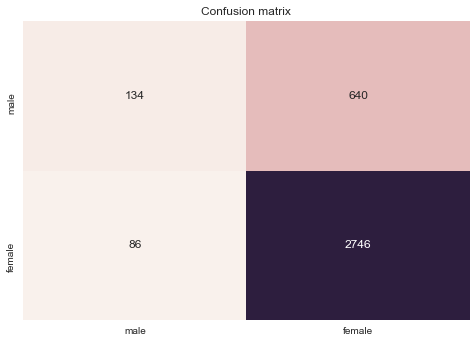

In [58]:
labels = list(set(y_test))
print(classification_report(y_test, y_pred1))
sns.heatmap(data=confusion_matrix(y_test, y_pred1, labels = labels), 
            annot=True, fmt="d", cbar=False, xticklabels=['male', 'female'], 
                                             yticklabels=['male', 'female'])
plt.title("Confusion matrix")
plt.show()

### Model2. Bidirectional LSTM
- Два слоя 128 нейронов;
- Dropout 0.2

LSTM - рекуррентная сеть, предоставляет возможность предсказывать метку класса по предыдущей прочитанной цепочке. Bidirectional  LSTM сеть совершает два прохода по цепочке, прямой и обратный, что позволяет ей хранить не только информацию о предыдущих состояниях, но и о последующих. 

In [59]:
model2 = Sequential()
model2.add(Bidirectional(LSTM(128, return_sequences=True),
                        input_shape=(max_len_name, len(alphabet))))
model2.add(Dropout(0.2))
model2.add(Bidirectional(LSTM(128, return_sequences=False)))
model2.add(Dropout(0.2))
model2.add(Dense(2))
model2.add(Activation('softmax'))

model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [60]:
model2.fit(X_train_encoded, Y_train, batch_size=16, nb_epoch=5)

C:\Program Files\Anaconda3\envs\mllecture\lib\site-packages\keras\models.py:848: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/5
3609/3609 [==============================] - 57s - loss: 0.3748 - acc: 0.8288    
Epoch 2/5
3609/3609 [==============================] - 52s - loss: 0.2639 - acc: 0.8886    
Epoch 3/5
3609/3609 [==============================] - 48s - loss: 0.2448 - acc: 0.8975    
Epoch 4/5
3609/3609 [==============================] - 55s - loss: 0.2441 - acc: 0.8966    
Epoch 5/5
3609/3609 [==============================] - 52s - loss: 0.2458 - acc: 0.8930    


In [61]:
y_pred2 = model2.predict_classes(X_test_encoded)

3606/3606 [==============================] - 14s    


             precision    recall  f1-score   support

          0       0.52      0.12      0.20       774
          1       0.80      0.97      0.88      2832

avg / total       0.74      0.79      0.73      3606



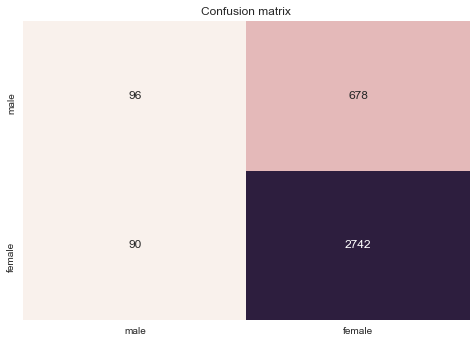

In [62]:
labels = list(set(y_test))
print(classification_report(y_test, y_pred2))
sns.heatmap(data=confusion_matrix(y_test, y_pred2, labels = labels), 
            annot=True, fmt="d", cbar=False, xticklabels=['male', 'female'], 
                                             yticklabels=['male', 'female'])
plt.title("Confusion matrix")
plt.show()

Bidirectional LSTM слои не дали преимущества, по сравнению с обычным LSTM.

In [242]:
counter_x = 0
counter_y = 0
for mark in y_train:
    if mark == 0:
        counter_x +=1
    else:
        counter_y +=1
print('male:', counter_x, 'female:', counter_y)

male: 1804 female: 1805


### Model3. Bidirectional LSTM
Попробуем улучшить качество модели, увеличив dropout. Dropout слои обнуляют заданную часть весов на предыдущем слое, таким образом, на каждом шаге часть связей, отобранных случайным образом, не передается на следующий слой, что позволяет бороться с переобучением. 
* Dropout 0.4;
* 128 узлов на обоих слоях LSTM

In [67]:
model3 = Sequential()
model3.add(Bidirectional(LSTM(128, return_sequences=True),
                        input_shape=(max_len_name, len(alphabet))))
model3.add(Dropout(0.4))
model3.add(Bidirectional(LSTM(128, return_sequences=False)))
model3.add(Dropout(0.4))
model3.add(Dense(2))
model3.add(Activation('softmax'))

model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [68]:
model3.fit(X_train_encoded, Y_train, batch_size=16, nb_epoch=5)

C:\Program Files\Anaconda3\envs\mllecture\lib\site-packages\keras\models.py:848: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/5
3609/3609 [==============================] - 51s - loss: 0.3673 - acc: 0.8238    
Epoch 2/5
3609/3609 [==============================] - 47s - loss: 0.2733 - acc: 0.8811    
Epoch 3/5
3609/3609 [==============================] - 54s - loss: 0.2560 - acc: 0.8881    
Epoch 4/5
3609/3609 [==============================] - 51s - loss: 0.2432 - acc: 0.8986    
Epoch 5/5
3609/3609 [==============================] - 63s - loss: 0.2356 - acc: 0.9005    


In [69]:
y_pred3 = model3.predict_classes(X_test_encoded)

3606/3606 [==============================] - 16s    


             precision    recall  f1-score   support

          0       0.52      0.12      0.20       774
          1       0.80      0.97      0.88      2832

avg / total       0.74      0.79      0.73      3606



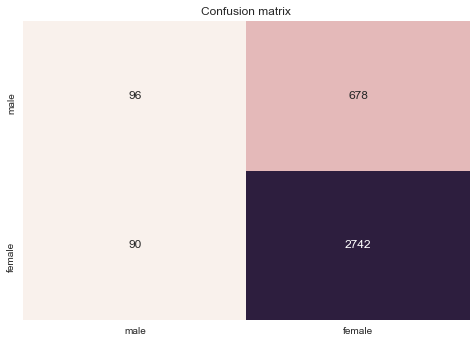

In [70]:
labels = list(set(y_test))
print(classification_report(y_test, y_pred2))
sns.heatmap(data=confusion_matrix(y_test, y_pred2, labels = labels), 
            annot=True, fmt="d", cbar=False, xticklabels=['male', 'female'], 
                                             yticklabels=['male', 'female'])
plt.title("Confusion matrix")
plt.show()

Увеличение значения dropout тоже не сильно повлияло на качество сети.

### Model4. LSTM
- Разное количество узлов на разных слоях: первый слой - 128, второй - 64
- Dropout 0.2

In [71]:
model4 = Sequential()
model4.add(LSTM(128, return_sequences=True, input_shape=(max_len_name, len(alphabet))))
model4.add(Dropout(0.2))
model4.add(LSTM(64, return_sequences=False))
model4.add(Dropout(0.2))
model4.add(Dense(2))
model4.add(Activation('softmax'))

#model.compile(loss='binary_crossentropy', optimizer='rmsprop')
model4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [72]:
model4.fit(X_train_encoded, Y_train, batch_size=16, nb_epoch=5)

C:\Program Files\Anaconda3\envs\mllecture\lib\site-packages\keras\models.py:848: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/5
3609/3609 [==============================] - 22s - loss: 0.4008 - acc: 0.8022    
Epoch 2/5
3609/3609 [==============================] - 15s - loss: 0.3039 - acc: 0.8717    
Epoch 3/5
3609/3609 [==============================] - 15s - loss: 0.2815 - acc: 0.8789    
Epoch 4/5
3609/3609 [==============================] - 18s - loss: 0.2676 - acc: 0.8822    
Epoch 5/5
3609/3609 [==============================] - 21s - loss: 0.2584 - acc: 0.8892    


In [73]:
y_pred4 = model4.predict_classes(X_test_encoded)

3584/3606 [============================>.] - ETA: 0s

             precision    recall  f1-score   support

          0       0.68      0.21      0.32       774
          1       0.82      0.97      0.89      2832

avg / total       0.79      0.81      0.77      3606



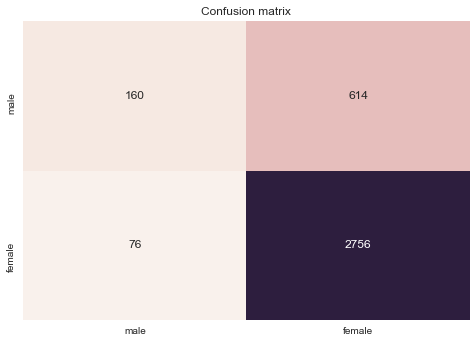

In [74]:
labels = list(set(y_test))
print(classification_report(y_test, y_pred4))
sns.heatmap(data=confusion_matrix(y_test, y_pred4, labels = labels), 
            annot=True, fmt="d", cbar=False, xticklabels=['male', 'female'], 
                                             yticklabels=['male', 'female'])
plt.title("Confusion matrix")
plt.show()

Эксперименты с числом нейронов в LSTM слоях позволили повысить качество классификации. Архитектура со 128 нейронами на первом LSTM слое и 64 на втором показала лучшие результаты. 

### Model6. LSTM
- Два слоя по 512 нейронов
- Dropout 0.4

In [79]:
model6 = Sequential()
model6.add(LSTM(512, return_sequences=True, input_shape=(max_len_name, len(alphabet))))
model6.add(Dropout(0.4))
model6.add(LSTM(512, return_sequences=False))
model6.add(Dropout(0.2))
model6.add(Dense(2))
model6.add(Activation('softmax'))

model6.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [80]:
model6.fit(X_train_encoded, Y_train, batch_size=16, nb_epoch=5)

C:\Program Files\Anaconda3\envs\mllecture\lib\site-packages\keras\models.py:848: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/5
3609/3609 [==============================] - 206s - loss: 0.3914 - acc: 0.8227   
Epoch 2/5
3609/3609 [==============================] - 193s - loss: 0.3232 - acc: 0.8612   
Epoch 3/5
3609/3609 [==============================] - 196s - loss: 0.3351 - acc: 0.8579   
Epoch 4/5
3609/3609 [==============================] - 196s - loss: 0.2962 - acc: 0.8761   
Epoch 5/5
3609/3609 [==============================] - 190s - loss: 0.3039 - acc: 0.8700   


In [81]:
y_pred6 = model6.predict_classes(X_test_encoded)

3606/3606 [==============================] - 40s    


             precision    recall  f1-score   support

          0       0.67      0.18      0.28       774
          1       0.81      0.98      0.89      2832

avg / total       0.78      0.81      0.76      3606



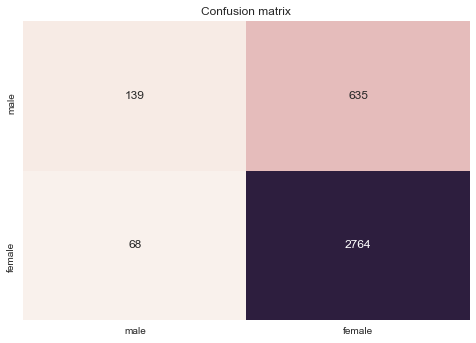

In [82]:
labels = list(set(y_test))
print(classification_report(y_test, y_pred6))
sns.heatmap(data=confusion_matrix(y_test, y_pred6, labels = labels), 
            annot=True, fmt="d", cbar=False, xticklabels=['male', 'female'], 
                                             yticklabels=['male', 'female'])
plt.title("Confusion matrix")
plt.show()

Значительное увеличение числа нейроно на обоих слоях тоже не дало заметного изменения в результатах.

Самое высокое качество классификации получилось с использованием сети с двумя LSTM слоями, на первом слое 128 нейронов, на втором - 64 нейрона (F-мера = 77%), что сходится с представлением о том, что на скрытых слоях должно быть  среднее между входным и выходным слоем число нейронов.

По сравнению с Наивным Байесовским классификатором средние по классам значения метрик качества выше для нейронной сети, однако у нейросети больше разброс по метрикам качества между классами. <br>
Интересно, что классификатор Байеса лучше определяет мужские имена, а нейросеть женские. Но найти этому логического объяснения не удалось.